In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To laod Dataset 
df=pd.read_csv("advertising.csv")

In [4]:
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [5]:
#To show no. of rows and colmns in given dataset 
df.shape

(200, 5)

In [6]:
#To delete Unwanted column from given dataset permanently 
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [8]:
#to check datatypes  
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [9]:
#To check null values in given dataset 
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

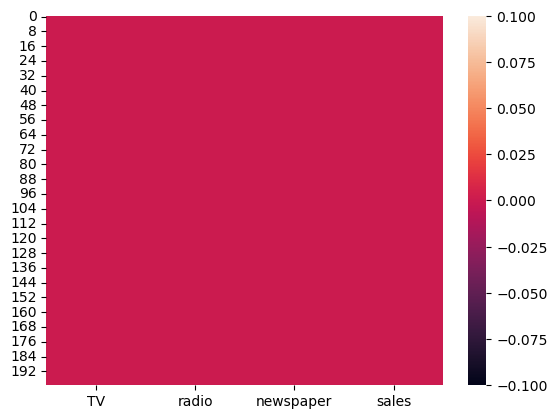

In [10]:
#visualise null values 
sns.heatmap(df.isnull())
plt.show()

In [11]:
#Step 2 : check duplicates rows
df.duplicated().sum()

0

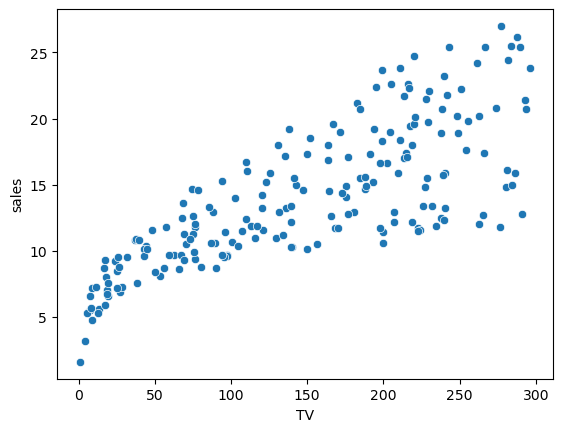

In [12]:
#visualise scatterplot between independent variable(input) TV and 
#output variable (sales) 
sns.scatterplot(data=df,x='TV',y='sales')
plt.show()

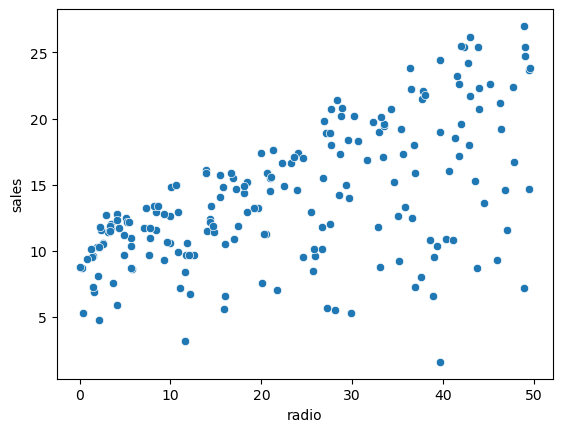

In [13]:
#visualise scatterplot between independent variable(input) radio and 
#output variable (sales) 
sns.scatterplot(data=df,x='radio',y='sales')
plt.show()

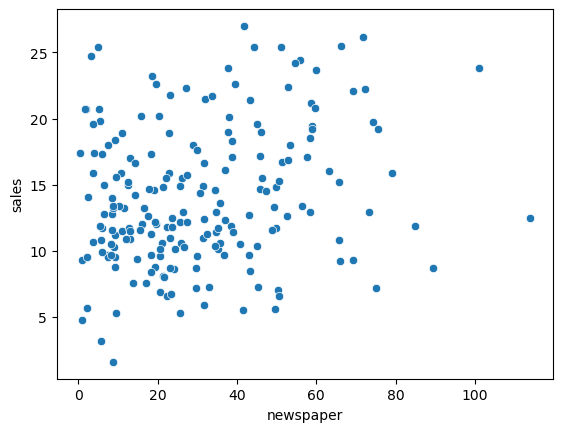

In [14]:
#visualise scatterplot between independent variable(input) newspaper and 
#output variable (sales) 
sns.scatterplot(data=df,x='newspaper',y='sales')
plt.show()

In [15]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

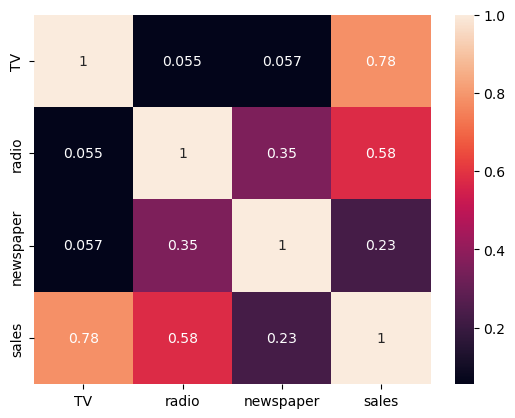

In [16]:
#check correlation coefficient between inputs and output
#use inbuilt method of numpy  package :   corr()
#visualize : use heatmap() 
sns.heatmap(df.corr(),annot=True) #annot means annotation means to print the
#correlation value if annot=True bydefau;t annot=False
plt.show()

In [17]:
#Clearly show in visualizaton and correlation value : -
#Input TV and input radio are important to predict(find) the output sales
#but newspaper input is not important to predict the output sales 
#clearly see correlation between TV and sales = 0.78 means +ve corr
#and correlation between radio and sales = 0.58 means +ve corr
#but bed correlation between input newspaper and output sales

In [18]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
#select input and output from given dataset
X=df[["TV","radio"]] #select input (2D)
Y=df["sales"]#select output(1D)

#input means features 

In [20]:
X.shape,X.columns

((200, 2), Index(['TV', 'radio'], dtype='object'))

In [21]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [22]:
#train test split : inbuilt function train_test_split()
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                               random_state=1)

In [24]:
X_train.head()

TV  radio
116  139.2   14.3
67   139.3   14.5
78     5.4   29.9
42   293.6   27.7
17   281.4   39.6

In [25]:
X_train.shape,Y_train.shape

((140, 2), (140,))

In [26]:
X_test.shape,Y_test.shape

((60, 2), (60,))

In [27]:
#Apply standardscaler on inputs X_train and X_test
#call class StandardScaler
from sklearn.preprocessing import StandardScaler

In [28]:
#create object of StandardScaler class
ss=StandardScaler()

In [29]:
#fit_transform() inbuilt method of StandardScaler class  , which
#apply on X_train(70% training input)
#transform() inbuilt method of StandardScaler class  , which
#apply on X_test(30% training input)
X_train=ss.fit_transform(X_train) #converts into numpy 2D array
X_test=ss.transform(X_test) #converts into numpy 2D array

In [30]:
type(X_train),type(X_test)

(numpy.ndarray, numpy.ndarray)

In [31]:
#perform ML model with LinearRegression 
from sklearn.linear_model import LinearRegression 
#LinearRegression  inbuilt class 

In [32]:
#create the object of LinearRegression  class
lr=LinearRegression() 

In [33]:
#Train the model with 70% data , use inbuilt method fit() of 
#LinearRegression  class
lr.fit(X_train,Y_train)

LinearRegression()

In [34]:
#To check slope or coefficient of each inputs 
#use inbuilt attributes  coef_
lr.coef_

array([4.06756287, 2.70136813])

In [35]:
#To check intercept , use inbuilt attribute intercept_
lr.intercept_

13.79142857142857

In [36]:
#output :  Y_pred=m1*TV+m2*radio+c
#Test the model with 30% data  , 
#use inbuilt method predict() of LinearRegression class, and return answer
#which are predicted output
#input : X_test and Actual output Y_test
Y_pred=lr.predict(X_test).round(2)

In [37]:
Y_pred

array([21.68, 16.44,  7.71, 17.92, 18.67, 23.75, 16.25, 13.38,  9.12,
       17.28, 14.41,  9.86, 17.31, 16.61, 15.03, 15.42, 12.42, 17.35,
       11.1 , 18.1 ,  9.39, 12.65,  8.71, 10.5 , 11.36, 15.03,  9.73,
       19.47, 18.26, 17.21, 21.61, 14.58, 16.32, 12.35, 20.  , 15.38,
       14.02, 10.06, 20.95,  7.46,  3.65,  7.26,  5.99, 18.4 ,  8.3 ,
       14.13, 14.95, 20.37, 20.61, 19.48, 24.09, 14.89,  6.72, 19.75,
       18.99, 12.52, 14.19,  6.09, 15.4 ,  9.59])

In [38]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [39]:
dict={'Actual Output':Y_test,'Predicted output':Y_pred}
#converts dictionary into dataframe
df1=pd.DataFrame(dict)
df1

Actual Output  Predicted output
58            23.8             21.68
40            16.6             16.44
34             9.5              7.71
102           14.8             17.92
184           17.6             18.67
198           25.5             23.75
95            16.9             16.25
4             12.9             13.38
29            10.5              9.12
168           17.1             17.28
171           14.5             14.41
18            11.3              9.86
11            17.4             17.31
89            16.7             16.61
110           13.4             15.03
118           15.9             15.42
159           12.9             12.42
35            12.8             17.35
136            9.5             11.10
59            18.4             18.10
51            10.7              9.39
16            12.5             12.65
44             8.5              8.71
94            11.5             10.50
31            11.9             11.36
162           14.9             15.03
38            10.1              9.73
28            18.9             19.47
193           19.6             18.26
27            15.9             17.21
47            23.2             21.61
165           11.9             14.58
194           17.3             16.32
177           11.7             12.35
176           20.2             20.00
97            15.5             15.38
174           11.5             14.02
73            11.0             10.06
69            22.3             20.95
172            7.6              7.46
108            5.3              3.65
107            8.7              7.26
189            6.7              5.99
14            19.0             18.40
56             5.5              8.30
19            14.6             14.13
114           14.6             14.95
39            21.5             20.37
185           22.6             20.61
124           19.7             19.48
98            25.4             24.09
123           15.2             14.89
119            6.6              6.72
53            21.2             19.75
33            17.4             18.99
179           12.6             12.52
181           12.2             14.19
106            7.2              6.09
199           13.4             15.40
138            9.6              9.59

In [40]:
#Find the mean squared error 
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred).round(2)
print("Mean Squared Error : ",mse)

Mean Squared Error :  1.91


In [41]:
##check score (0%-100%) means 0-1
#score() inbuilt method of LinearRegression
lr.score(X_test,Y_test).round(2) #testing score

0.92

In [42]:
lr.score(X_test,Y_test).round(2)*100 #testing score 

92.0

In [43]:
#check training score 
lr.score(X_train,Y_train).round(2)

0.88

In [44]:
#Always  training score >testing score  
#but in this case training score <testing score means model is under fit 
#means it is not a good model 
#here training score= 0.88 means 88%
#and testing score=0.92 means 92% 
#clearly training score<testing score 
#88%<92%  means model is underfit 

In [45]:
#if our model will be underfit then apply polynomial linear regression 
#means increase the power of inputs means increase the degree on inputs
#use PolynomialFeatures inbuilt class ,  its help to increase the
#degree of input columns

from sklearn.preprocessing import PolynomialFeatures

In [46]:
#create the object of PolynomialFeatures class and passing the degree of
#input =2 means quadratic
#pf=PolynomialFeatures(2)

#degree of input =3
pf=PolynomialFeatures(3)

In [47]:
#use fit_transform() inbuilt method of PolynomialFeatures class ,to increase
#the degree of input features 

X_poly=pf.fit_transform(X)

In [48]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,
                                               random_state=1)    

In [49]:
#Apply StandardScaler on training input X_train and testing input X_test
#create object of StandardScaler
ss=StandardScaler()
#fit_transform() inbuilt method of StandardScaler class  , which
#apply on X_train(70% training input)
#transform() inbuilt method of StandardScaler class  , which
#apply on X_test(30% testing input)
X_train=ss.fit_transform(X_train) #converts into numpy 2D array
X_test=ss.transform(X_test) #converts into numpy 2D array

In [50]:
#perform the model with LinearRegression 
#create the object of LinearRegression  class
lr=LinearRegression() 

In [51]:
#train the model with 70% training data , use inbuilt method fit() of 
#LinearRegression  class
lr.fit(X_train,Y_train)

LinearRegression()

In [52]:
#test the model with 30% testing input X_test : Y=mX+c ,use
#inbuilt method predict of LinearRegression class
#Y_pred=m1*TV+m2*TV**2+m3*radio+m4*radio**2+c
Y_pred=lr.predict(X_test)

In [53]:
dict={'Actual Output':Y_test,'Predicted output':Y_pred}
#converts dictionary into dataframe
df1=pd.DataFrame(dict)
df1

Actual Output  Predicted output
58            23.8         23.841888
40            16.6         16.154362
34             9.5          9.593118
102           14.8         14.865757
184           17.6         17.420540
198           25.5         25.472200
95            16.9         17.097140
4             12.9         12.923023
29            10.5         10.356254
168           17.1         16.854792
171           14.5         14.808870
18            11.3         10.769892
11            17.4         16.940170
89            16.7         17.571036
110           13.4         12.954220
118           15.9         16.479427
159           12.9         13.347708
35            12.8         13.260786
136            9.5          8.643959
59            18.4         18.268077
51            10.7         10.896747
16            12.5         12.569882
44             8.5          7.624229
94            11.5         11.792173
31            11.9         12.523031
162           14.9         14.773386
38            10.1          9.407978
28            18.9         18.964441
193           19.6         19.638868
27            15.9         15.646857
47            23.2         22.891192
165           11.9         11.741839
194           17.3         17.397822
177           11.7         12.094323
176           20.2         19.872794
97            15.5         15.373090
174           11.5         11.592242
73            11.0         11.037799
69            22.3         22.487360
172            7.6          6.748775
108            5.3          5.300472
107            8.7          9.296018
189            6.7          6.273259
14            19.0         18.927484
56             5.5          5.779619
19            14.6         14.902362
114           14.6         14.903319
39            21.5         21.211814
185           22.6         22.261408
124           19.7         19.726599
98            25.4         25.969396
123           15.2         15.910938
119            6.6          6.523425
53            21.2         21.462732
33            17.4         17.456169
179           12.6         12.502529
181           12.2         12.088481
106            7.2          6.766556
199           13.4         13.173522
138            9.6          9.330684

In [54]:
#Find the mean squared error 
mse=mean_squared_error(Y_test,Y_pred).round(2)
print("Mean Squared Error : ",mse)

Mean Squared Error :  0.14


In [55]:
#Find the testing score , use inbuilt method score of LinearRgeression class
score1=lr.score(X_test,Y_test).round(2)
print("Testing Score : ",score1)

Testing Score :  0.99


In [56]:
#Find the training score , use inbuilt method score of 
#LinearRgeression class
score2=lr.score(X_train,Y_train).round(2)
print("Training Score : ",score2)

Training Score :  0.99
